# Imports

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
import numpy as np


In [2]:
tf.config.list_physical_devices('GPU')


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
PATH_DATA = "../data/Passageiros.csv"


# Code

## Configurations

In [57]:
mpl.rcParams['figure.figsize']=(10,6)

## Export and view data

In [5]:
df_passengers = pd.read_csv(PATH_DATA)
df_passengers.sample(5)


,tempo,passageiros
35,1951.916667,166
54,1953.500000,264
51,1953.250000,235
49,1953.083333,196
103,1957.583333,467


<AxesSubplot:xlabel='tempo', ylabel='passageiros'>

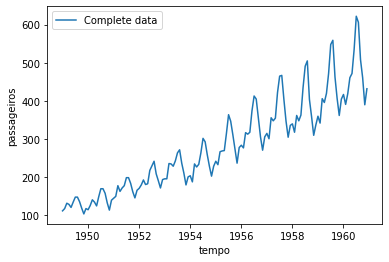

In [6]:
sns.lineplot(
    data=df_passengers,
    x='tempo',
    y='passageiros',
    label='Complete data'
)


## Scaler data

In [7]:
sc = StandardScaler()


In [8]:
sc.fit(df_passengers)

StandardScaler()

In [9]:
scaler_data=sc.transform(df_passengers)

In [10]:
x = scaler_data[:, 0]
y = scaler_data[:, 1]


<AxesSubplot:>

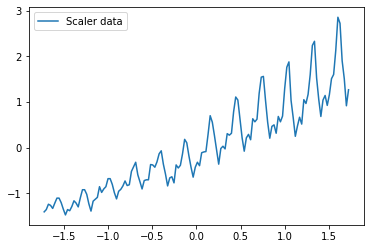

In [11]:
sns.lineplot(
    x=x,
    y=y,
    label='Scaler data'
)


## Split data to train

In [12]:
data_size = len(df_passengers)
size_train = int(data_size*0.9)
size_test = data_size-size_train


In [13]:
x_train, y_train, x_test, y_test = (
    x[0:size_train], y[0:size_train], 
    x[size_train:data_size], y[size_train:data_size]
    )


<AxesSubplot:>

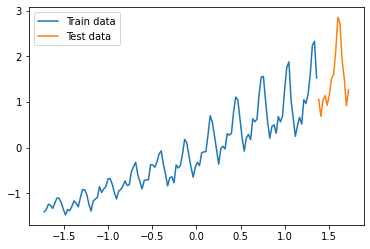

In [14]:
sns.lineplot(
    x=x_train,
    y=y_train,
    label='Train data'
)
sns.lineplot(
    x=x_test,
    y=y_test,
    label='Test data'
)


## Linear regression

In [15]:
model_regression = Sequential()
model_regression.add(
    Dense(
        1,
        input_dim=1,
        kernel_initializer='Ones',
        activation='linear',
        use_bias=False
    )
)
model_regression.compile(loss='mean_squared_error', optimizer='adam')


In [16]:
model_regression.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 1         
                                                                 
Total params: 1
Trainable params: 1
Non-trainable params: 0
_________________________________________________________________


In [17]:
model_regression.fit(x_train,y_train)

5/5 [==============================] - 2s 26ms/step - loss: 0.1285


In [18]:
y_predict=model_regression.predict(x_train)

5/5 [==============================] - 0s 1ms/step


[Text(0.5, 1.0, 'Predict with linear regression')]

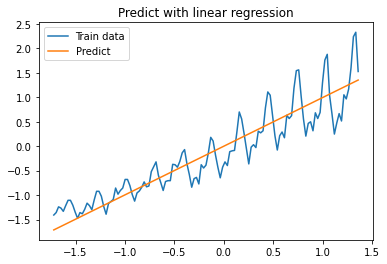

In [19]:
sns.lineplot(
    x=x_train,
    y=y_train,
    label='Train data'
)
sns.lineplot(
    x=x_train,
    y=y_predict[:,0],
    label='Predict'
).set(title="Predict with linear regression")



### Back to initial values

In [20]:
df_result_linear_regression =pd.DataFrame({
    'time':x_train,
    'passengers': y_predict[:,0]
})

df_result_linear_regression.sample(5)

,time,passengers
28,-1.046473,-1.041810
116,1.070529,1.065760
78,0.156369,0.155673
10,-1.479496,-1.472904
6,-1.575723,-1.568703


In [21]:
df_result_linear_regression_transf = pd.DataFrame(
    sc.inverse_transform(df_result_linear_regression),
    columns=["time", "passengers"]
)
df_result_linear_regression_transf.sample(5)

,time,passengers
72,1955.000000,281.730190
94,1956.833333,344.719687
70,1954.833333,276.003873
45,1952.750000,204.424903
107,1957.916667,381.940745


<AxesSubplot:xlabel='tempo', ylabel='passageiros'>

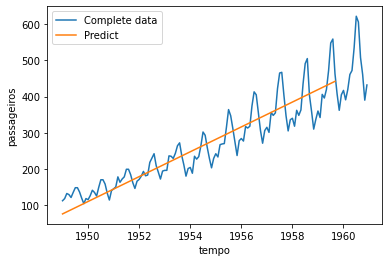

In [22]:
sns.lineplot(
    data=df_passengers,
    x='tempo',
    y='passageiros',
    label='Complete data'
)
sns.lineplot(
    data=df_result_linear_regression_transf,
    x='time',
    y='passengers',
    label='Predict'
)


In [23]:
y_predict_test= model_regression.predict(x_test)


1/1 [==============================] - 0s 18ms/step


In [24]:
df_result_linear_regression_test = pd.DataFrame({
    'time': x_test,
    'passengers': y_predict_test[:, 0]
})

df_result_linear_regression_test.sample(5)


,time,passengers
5,1.503553,1.496854
3,1.455439,1.448954
8,1.575723,1.568703
14,1.720064,1.712401
7,1.551666,1.544753


In [25]:
df_result_linear_regression_test_transf = pd.DataFrame(
    sc.inverse_transform(df_result_linear_regression_test),
    columns=["time", "passengers"]
)
df_result_linear_regression_test_transf.sample(5)


,time,passengers
14,1960.916667,485.014456
0,1959.750000,444.930236
2,1959.916667,450.656560
4,1960.083333,456.382883
13,1960.833333,482.151316


<AxesSubplot:xlabel='tempo', ylabel='passageiros'>

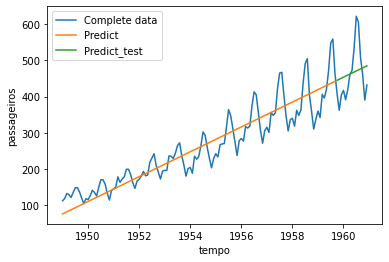

In [26]:
sns.lineplot(
    data=df_passengers,
    x='tempo',
    y='passageiros',
    label='Complete data'
)
sns.lineplot(
    data=df_result_linear_regression_transf,
    x='time',
    y='passengers',
    label='Predict'
)
sns.lineplot(
    data=df_result_linear_regression_test_transf,
    x='time',
    y='passengers',
    label='Predict_test'
)


## Linear regression multi fields

In [27]:
model_regression_multi_fields = Sequential(
   [ 
    Dense(
        8,
        input_dim=1,
        kernel_initializer='random_uniform',
        activation='sigmoid',
        use_bias=False
    ), 
    Dense(
        8,
        kernel_initializer='random_uniform',
        activation='sigmoid',
        use_bias=False
    ),
    Dense(
        1,
        kernel_initializer='random_uniform',
        activation='linear',
        use_bias=False
    )
    ]
)
model_regression_multi_fields.compile(loss='mean_squared_error', optimizer='adam')


In [28]:
model_regression_multi_fields.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 8)                 8         
                                                                 
 dense_2 (Dense)             (None, 8)                 64        
                                                                 
 dense_3 (Dense)             (None, 1)                 8         
                                                                 
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________


In [29]:
model_regression_multi_fields.fit(x_train,y_train,epochs=1000)

Epoch 1/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.8034
Epoch 2/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.7983
Epoch 3/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.7952
Epoch 4/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.7939
Epoch 5/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.7922
Epoch 6/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.7915
Epoch 7/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.7907
Epoch 8/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.7903
Epoch 9/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.7889
Epoch 10/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.7882
Epoch 11/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.7876
Epoch 12/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.7870
Epoch 13/1000
5/5 [==============================

In [30]:
y_predict = model_regression_multi_fields.predict(x_train)
y_predict_test = model_regression_multi_fields.predict(x_test)


1/1 [==============================] - 0s 16ms/step


<AxesSubplot:>

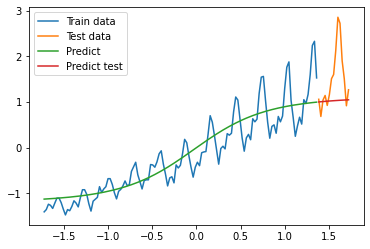

In [31]:
sns.lineplot(
    x=x_train,
    y=y_train,
    label='Train data'
)
sns.lineplot(
    x=x_test,
    y=y_test,
    label='Test data'
)
sns.lineplot(
    x=x_train,
    y=y_predict[:,0],
    label='Predict'
)
sns.lineplot(
    x=x_test,
    y=y_predict_test[:, 0],
    label='Predict test'
)


## Edit data to train

In [60]:
def processing_delay_data(vector,n_steps):
    x_new, y_new = [],[]
    for i in range(n_steps,vector.shape[0]):
        x_new.append(list(vector.loc[i-n_steps:i-1]))
        y_new.append(vector.loc[i])
    x_new, y_new = np.array(x_new), np.array(y_new)
    return x_new, y_new


In [37]:
vector_train = pd.DataFrame(y_train)[0]
vector_test =  pd.DataFrame(y_test)[0]

In [38]:
x_train_new, y_train_new = processing_delay_data(vector_train, 1)
x_test_new, y_test_new = processing_delay_data(vector_test, 1)


In [39]:
model_regression_delay_passengers = Sequential(
    [
        Dense(
            8,
            input_dim=1,
            kernel_initializer='ones',
            activation='linear',
            use_bias=False
        ),
        Dense(
            64,
            kernel_initializer='random_uniform',
            activation='sigmoid',
            use_bias=False
        ),
        Dense(
            1,
            kernel_initializer='random_uniform',
            activation='linear',
            use_bias=False
        )
    ]
)
model_regression_delay_passengers.compile(
    loss='mean_squared_error', optimizer='adam')


In [40]:
model_regression_delay_passengers.fit(x_train_new,y_train_new,epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7886
Epoch 2/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7520
Epoch 3/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7319
Epoch 4/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7152
Epoch 5/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6972
Epoch 6/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6739
Epoch 7/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6506
Epoch 8/100
4/4 [==============================] - 0s 4ms/step - loss: 0.6255
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5968
Epoch 10/100
4/4 [==============================] - 0s 4ms/step - loss: 0.5680
Epoch 11/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5354
Epoch 12/100
4/4 [==============================] - 0s 4ms/step - loss: 0.5006
Epoch 13/100
4/4 [==============================] - 0s 3ms/st

In [45]:
y_predict_train_new = model_regression_delay_passengers.predict(x_train_new)
y_predict_test_new = model_regression_delay_passengers.predict(x_test_new)


1/1 [==============================] - 0s 18ms/step


<AxesSubplot:xlabel='tempo', ylabel='0'>

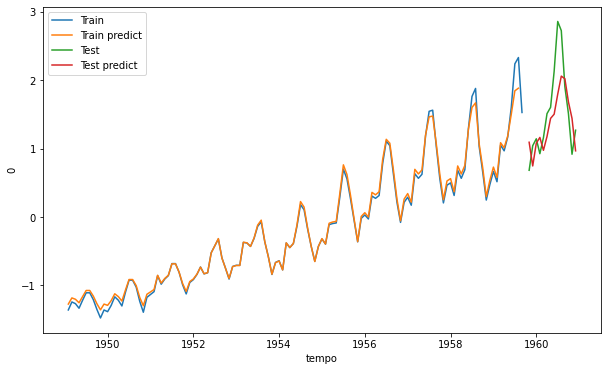

In [58]:
sns.lineplot(
    data=df_passengers[1:129],
    x='tempo',
    y=y_train_new,
    label='Train'
)

sns.lineplot(
    data=df_passengers[1:129],
    x='tempo',
    y=pd.DataFrame(y_predict_train_new)[0],
    label='Train predict'
)

sns.lineplot(
    data=df_passengers[130:144],
    x='tempo',
    y=y_test_new,
    label='Test'
)

sns.lineplot(
    data=df_passengers[130:144],
    x='tempo',
    y=pd.DataFrame(y_predict_test_new)[0].values,
    label='Test predict'
)


### More history months

In [61]:
x_train_new_4, y_train_new_4 = processing_delay_data(vector_train, 4)
x_test_new_4, y_test_new_4 = processing_delay_data(vector_test, 4)


In [84]:
model_regression_delay_passengers_4 = Sequential(
    [
        Dense(
            8,
            input_dim=4,
            kernel_initializer='ones',
            activation='linear',
            use_bias=False
        ),
        Dense(
            64,
            kernel_initializer='random_uniform',
            activation='sigmoid',
            use_bias=False
        ),
        Dense(
            1,
            kernel_initializer='random_uniform',
            activation='linear',
            use_bias=False
        )
    ]
)
model_regression_delay_passengers_4.compile(
    loss='mean_squared_error', optimizer='adam')


In [86]:
model_regression_delay_passengers_4.fit(
    x_train_new_4, y_train_new_4, epochs=1000,  validation_split=0.2)


Epoch 1/1000
4/4 [==============================] - 0s 54ms/step - loss: 0.5590 - val_loss: 1.6469
Epoch 2/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.4560 - val_loss: 1.7848
Epoch 3/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.3893 - val_loss: 1.8597
Epoch 4/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.3608 - val_loss: 1.8552
Epoch 5/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.3431 - val_loss: 1.7507
Epoch 6/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.3230 - val_loss: 1.6107
Epoch 7/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.2983 - val_loss: 1.4236
Epoch 8/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.2704 - val_loss: 1.2483
Epoch 9/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.2403 - val_loss: 1.0846
Epoch 10/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.2188 - val_loss: 0.9299
Epoch 11/

In [87]:
y_predict_train_new_4 = model_regression_delay_passengers_4.predict(x_train_new_4)
y_predict_test_new_4 = model_regression_delay_passengers_4.predict(x_test_new_4)


1/1 [==============================] - 0s 16ms/step


<AxesSubplot:xlabel='tempo'>

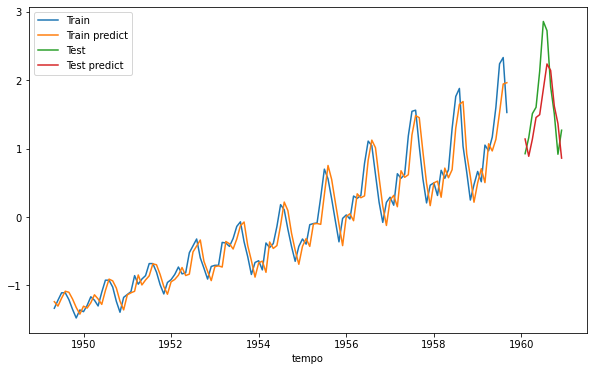

In [88]:
sns.lineplot(
    data=df_passengers[4:129],
    x='tempo',
    y=y_train_new_4,
    label='Train'
)

sns.lineplot(
    data=df_passengers[4:129],
    x='tempo',
    y=pd.DataFrame(y_predict_train_new_4)[0].values,
    label='Train predict'
)

sns.lineplot(
    data=df_passengers[133:144],
    x='tempo',
    y=y_test_new_4,
    label='Test'
)

sns.lineplot(
    data=df_passengers[133:144],
    x='tempo',
    y=pd.DataFrame(y_predict_test_new_4)[0].values,
    label='Test predict'
)
